# Crawling the Job Market
Authors: Sameer NANDIKAR(u1010576), Byron ENG <br>
CS 5963 / MATH 3900 <br>
email id: sameer.nandikar@gmail.com 
          ; byron.eng@gmail.com

## Background and Motivation
We the authors of this project will be graduating in near future. Thus we need to look for jobs in our respective fields (which in our case is Mechanical Engineering and Atmospheric Sciences) or continue academics in a well-informed direction for better job opportunities. In either case a comperhensive analysis of the job market depicting trends and classifications can be really benificial. 

Motivation for this project comes from some obstacles encounterd in the job search, some of which we have tried to elaborate here. Though there are many job search websites which provide a plethora of information about jobs available, one can not draw useful conclusions about the job market such as density of reasearch and development jobs for a mechanical engineer in medical device sector in state of Utah, without analysis of that information. In addition to that, job openings in most of the industries related to Mechanical Engineering are requirement oriented and have very short lead times for joining thus it would be interesting to see if there are any trends in job openings and use the information to benefit the job seekers to decide when to graduate. These are just few queries among other problems we intend to solve. 

One more aspect of this project includes classification of jobs according to job function and sector, which will help an aspiring Graduate student to take an informed decision to select an area of interest (such as designing, manufacturing, robotics, energy systems).  

## Project Objectives
This project aims to be a tool for anyone entering the job market. The key objective of this project is the analysis of the job market which will include but will not be limited to
- Geospatial density of jobs
- Pay rates vs. experience level
- Pay rates vs. education level
- Classification of jobs on basis of sector (e.g.aerospace, automobile, medical device, energy, mining equipment etc)
- Classification of jobs on basis of job function (e.g. production, quality control, design, research and development etc)
- Annual trend of job openings for different sectors and job functions for different states 

## Data

At this stage we are looking from which websites we can scrap the data and which websites have APIs. Given below is the information of our current options

### Inventory of data sources

|Site|Comments|Allowed (scraping)|Disallowed (scraping)|API|API Reference
|----|--------|:-----:|:--------:|---
|Glassdoor.com|Has mostly disallows. Because we are going to be using the search, I don't think we are allowed to crawl.||x|Yes|https://www.glassdoor.com/developer/index.htm (access requested)
|usajobs.gov|Disallows scripts||x|Yes|https://developer.usajobs.gov/API-Reference
|dice.com|Disallows jobsearch||x|Yes|http://www.dice.com/common/content/util/apidoc/jobsearch.html
|snagajob.com|Disallows basically everything||x|No|-|
|simplyhired.com|Links to other sites, disallows job details but not job SEARCH||x|No|-|
|careerbuilder.com|Disallows everything unless you're the googlebot||x|Yes|Requested key
|careerinfonet.org|There's a lot that is disallowed, but I don't see anything that is clearly disallowing what we aim to do. Worth another look.||x|No|-|
|indeed.com|Mostly disallows everything ||x|Yes|Requested key|
|monster.com|Mostly disallows evferything||x|Yes|Regestration is required for access which is in progress|
|linkedin.com|Allows scraping with permission||x|Yes|https://api.linkedin.com/v1/people/~?format=json (but an access token is required which is requested)|
|bls.gov|||x|Yes|http://www.bls.gov/developers/api_python.htm





## Data Processing 

In addition to APIs, we will keep html scraping as an option. An html of a typical job search website has list of jobs and their links. A dataframe will be created by extracting the information about the jobs from the html page and from nested url links. We will use beautifulsoup and CSS selectors for this purpose. We expect much of the effort to be in data extraction and especially in data clean up because information about the jobs entered may not follow same format most of the times as it is entered by different users. We will be using classification methods to classify the jobs by the desired metrics (ie. degree requirement). Also we need to filter out the features which are out of our present scope of study.

## Exploratory Analysis

At this stage we intend to observe trends of job openings geographically as well as annually. Thus we will use scatter plots and other tools we have learned in this class for visualizations. Heuristic approach also seems appropriate for given purposes. For classification we intend to use SVM, Decision trees and k-NN and based on kind of results we get we will select best suitable method. 

## Analysis Methodlogy

We will first analyze the aggregated data to see geographical and annual trends. Also we will observe the effects of attributes over salary e.g. Pay rates vs. experience level and Pay rates vs. education level. 

Secondly for classification purposes based on the size of the data we get from one website we will either divide one website's data into training and test data or use data from one website as training and data from another website as test data. We will use classification methods enlisted above and select the best suitable one to visualize the data in scatter plots

## Project Schedule

We have 5 weeks till the presentation date 

Week 1 - Data acquisition and cleaning

Week 2 - Data processing 

Week 3 and 4 - Exploratory analysis

Week 5 - Preperation for the Presentation

# Data acquisition and cleaning

From above listed websites we chose indeed.com as it has well structured api in xml format and it doesn't require any authorization. For all the other websites we either didn't get authorization key for api or the key didn't work proporly. 
Before going further let us have a look at url of indeed.com api and it's terminology

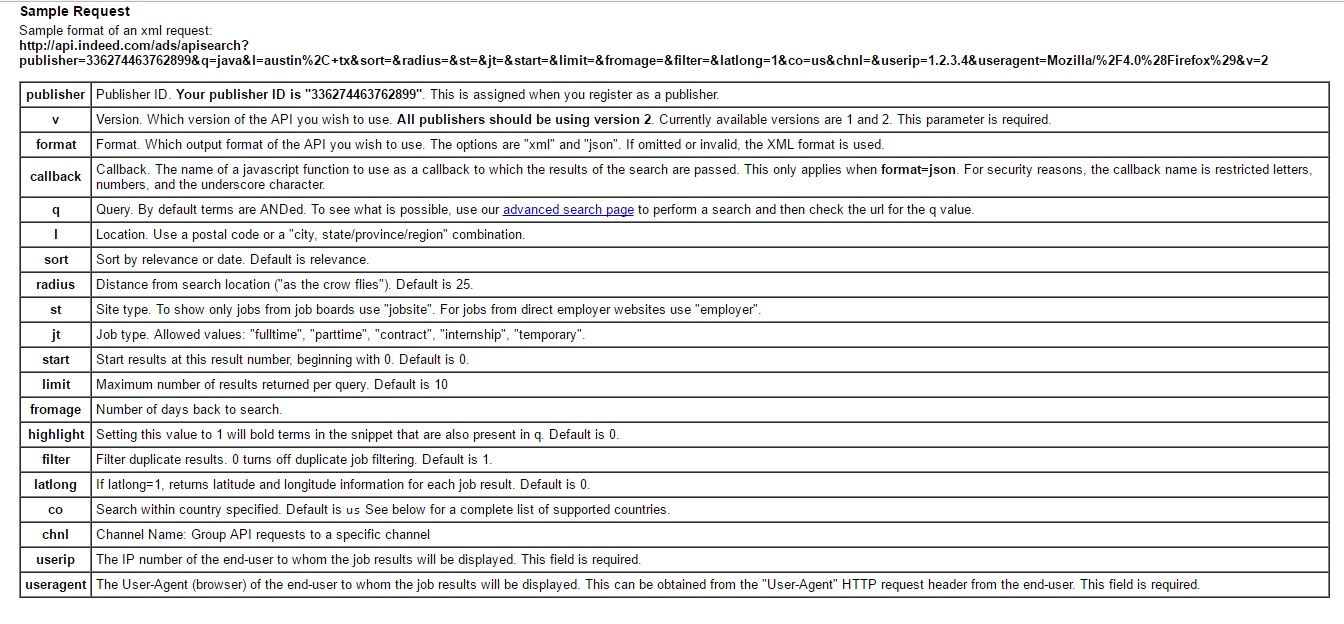

In [265]:
from IPython.display import Image
Image(filename='1.jpg')

From above information, following things can be understood:
- Jobs of specific type can be found by typing it in Query (e.g. q= java, as shown in above image)
- Job listings are provided as per city and state. Hence a dataframe is created with all the major cities and states in US.Wikipedia is refered for creating this dataframe. (https://en.wikipedia.org/wiki/List_of_United_States_cities_by_area)
- Jobs in radius around the city location can be found by specifying the radius (maximum is 25 miles). Radius of the cities is found from total area of the city from wikipedia.
- As we are looking for full time jobs we we have specified jt=fulltime
- There is limit on maximum results per querry and it is 25, we have not found a way to get next 25 results by rerunning the querry hence at this stage we have maximum 25 job listings per city.

Dataframe for cities in US by area is created below. Some cities from dataframe are ommited for time being because their names have to be entered differently in url. We will try to include those later.

In [270]:
#CSV file is downloaded from wikipedia and is loaded to create a dataframe
list_of_cities = pd.read_csv('list_of_cities_by_area.csv',encoding = "ISO-8859-1")

#Only names of the cities and states and total square feet area in miles is kept, data is cleaned to use in later part
list_of_cities=list_of_cities [['City','State','Total area (sq\xa0mi)']]
list_of_cities["Total area (sq\xa0mi)"]= list_of_cities["Total area (sq\xa0mi)"].str.replace(',','')
list_of_cities["City"]= list_of_cities["City"].str.replace('*','')
list_of_cities["Total area (sq\xa0mi)"]=list_of_cities["Total area (sq\xa0mi)"].convert_objects(convert_numeric=True)

#Radius of the city is calculated from total area and cleaning the data and converted to string to use in url
list_of_cities["radius"]=list_of_cities["Total area (sq\xa0mi)"].apply(lambda x: (x/(22/7))**0.5)
list_of_cities["radius"]=list_of_cities["radius"].fillna(0)
list_of_cities["radius"]=list_of_cities["radius"].astype(str)

#Replacing names of the states with their shortforms as same are used in url
list_of_cities=list_of_cities.replace({'State' : { 'Alabama' : 'al','Alaska' : 'ak','Arizona' : 'az','Arkansas' : 'ar',
                                                 'California' : 'ca','Colorado' : 'co','Connecticut' : 'ct','Delaware' : 'de',
                                                  'Florida' : 'fl',
                                                 'Georgia' : 'ga','Hawaii' : 'hi','Idaho' : 'id','Illinois' : 'il','Indiana' : 'in'
                                                 ,'Iowa' : 'io','Kansas' : 'ks','Kentucky' : 'ky','Louisiana' : 'la','Maine' : 'me'
                                                 ,'Maryland' : 'md','Massachusetts' : 'ma','Michigan' : 'mi','Minnesota' : 'mn',
                                                  'Mississippi' : 'ms'
                                                 ,'Missouri' : 'mo','Montana' : 'mt','Nebraska' : 'ne','Nevada' : 'nv',
                                                  'New Hampshire' : 'nh'
                                                 ,'New Jersey' : 'nj','New Mexico' : 'nm','New York' : 'ny','North Carolina' : 'nc',
                                                 'North Dakota' : 'nd','Ohio' : 'oh','Oklahoma' : 'ok','Oregon' : 'or',
                                                 'Pennsylvania' : 'pa','South Carolina' : 'sc',
                                                 'South Dakota' : 'sd','Tennessee' : 'tn','Texas' : 'tx','Utah' : 'ut',
                                                 'Vermont' : 'vt','Virginia' : 'va','Washington' : 'wa','West Virginia' : 'wv',
                                                 'Wisconsin' : 'wi','Wyoming' : 'wy'}})

#Following are the cities which are ommited for time being as they are required to be entered differently in url, 
# We will try to include these in before final submission  
list_of_cities["City"]=list_of_cities["City"].str.lower()
list_of_cities=list_of_cities.drop(list_of_cities.index[[14]])
list_of_cities = list_of_cities.reset_index(drop=True)
list_of_cities=list_of_cities.drop(list_of_cities.index[[69]])
list_of_cities = list_of_cities.reset_index(drop=True)
list_of_cities=list_of_cities.drop(list_of_cities.index[[98]])
list_of_cities = list_of_cities.reset_index(drop=True)
list_of_cities=list_of_cities.drop(list_of_cities.index[[101]])
list_of_cities = list_of_cities.reset_index(drop=True)
list_of_cities=list_of_cities.drop(list_of_cities.index[[105]])
list_of_cities = list_of_cities.reset_index(drop=True)
list_of_cities=list_of_cities.drop(list_of_cities.index[[107]])
list_of_cities = list_of_cities.reset_index(drop=True)
list_of_cities=list_of_cities.drop(list_of_cities.index[[123]])
list_of_cities = list_of_cities.reset_index(drop=True)
list_of_cities=list_of_cities.drop(list_of_cities.index[[125]])
list_of_cities = list_of_cities.reset_index(drop=True)
list_of_cities=list_of_cities.drop(list_of_cities.index[[139]])
list_of_cities = list_of_cities.reset_index(drop=True)
list_of_cities


C:\Users\Sameer\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,City,State,Total area (sq mi),radius
0,sitka,ak,4811.40,39.1267172147
1,juneau,ak,3253.90,32.1765725052
2,wrangell,ak,3462.10,33.1900176669
3,anchorage,ak,1961.00,24.979082158
4,jacksonville,fl,885.00,16.7806706985
5,anaconda,mt,741.20,15.3569646622
6,butte,mt,716.80,15.1020769192
7,oklahoma city,ok,620.34,14.0492316192
8,houston,tx,627.80,14.1334548308
9,phoenix,az,517.90,12.836914101


Lets have look at api structure

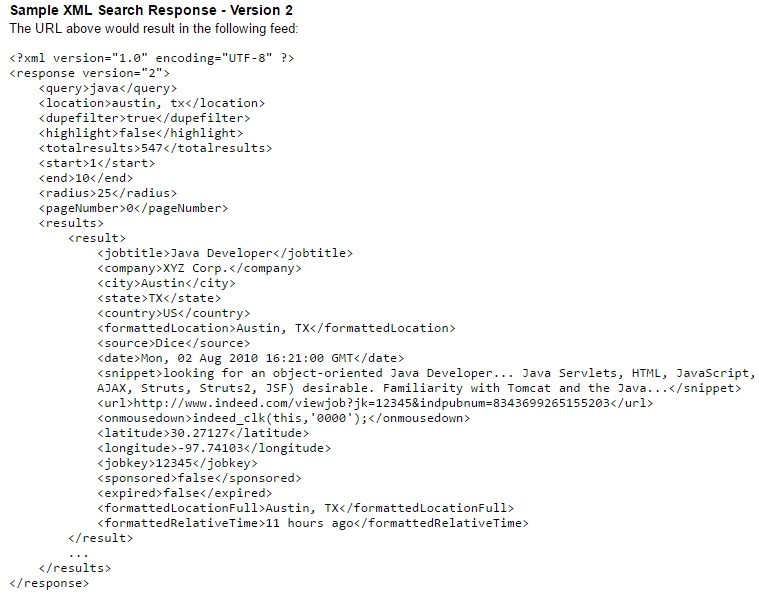

In [269]:
from IPython.display import Image
Image(filename='2.jpg')

Element tree is used to access the data in the xml

In [272]:
import xml.etree.ElementTree as ET
import urllib.request
import os.path
import pandas as pd

#Creating iterator to iterate over number of cities
iterator = []
for i in range (0,len(list_of_cities.axes[0]),1):
    iterator.append(i)
iterator

#Creating columns for dataframe, we will seperate education level, skills and responsibilities but now we have these in one column 
# as they are in single snippet.
columns = ['Job title','company','city','state','education level/skills required / responsibilities',"longitude","latitude"]

#Creating an empty dataframe, to enter job listings
jobs_indeed= pd.DataFrame(columns=columns)

#Creating a for loop for looping over all the cities
for i in iterator:
    
    #Assiging varibles 
    city = list_of_cities.get_value(i,'City')
    state = list_of_cities.get_value(i,'State')
    keyword = "mechanical"
    radius = list_of_cities.get_value(i,'radius')
    
    # Combining variables with url
    #Some cities have area zero thus radius zero but apart from very few cities all the other cities have radius about 10 miles
    #thus creating if condition to use default value of radius 
    if radius == 0:
        url = "http://api.indeed.com/ads/apisearch?publisher=336274463762899&format=xml&q="+keyword+"&l="+city+"%2C+"+state+"&sort=&radius=&st=&jt=fulltime&start=&limit=5000&fromage=&filter=&latlong=1&co=us&chnl=&userip=1.2.3.4&useragent=Mozilla/%2F4.0%28Firefox%29&v=2"
    
    #Else use radius from dataframe
    else:
        url = "http://api.indeed.com/ads/apisearch?publisher=336274463762899&format=xml&q="+keyword+"&l="+city+"%2C+"+state+"&sort=&radius="+radius+"&st=&jt=fulltime&start=&limit=5000&fromage=&filter=&latlong=1&co=us&chnl=&userip=1.2.3.4&useragent=Mozilla/%2F4.0%28Firefox%29&v=2"

    filename = './xml/'+city+state+'.html'
    if os.path.isfile(filename):
        #print("Using existing file: "+filename)
        # here we actually access the website
        #print("Accessing indeed.com")
        with urllib.request.urlopen(url) as response:
            html = response.read()
            html = html.decode('utf-8')

    # print("Saving new file: "+filename)
    # save the file
    with open('./xml/'+city+state+'.html', 'w') as new_file:
        new_file.write(html)
    #here it's already a local operation
    root = ET.fromstring(html)
    i=0
    
    #Creating a for loop to get job listings in each city
    for jobs in root.iter('result'):
        columns = ['Job title','company','city','state','education level/skills required / responsibilities',"longitude","latitude"]
        df = pd.DataFrame(columns=columns)
        i=i
        df.set_value(i,'Job title',jobs[0].text)
        df.set_value(i,'company',jobs[1].text)
        df.set_value(i,'city',jobs[2].text)
        df.set_value(i,'state',jobs[3].text)
        df.set_value(i,'education level/skills required / responsibilities',jobs[8].text)
        df.set_value(i,'longitude',jobs[11].text)
        df.set_value(i,'latitude',jobs[12].text)
        i=i+1

        jobs_indeed=jobs_indeed.append(df)

In [273]:
jobs_indeed

,Job title,company,city,state,education level/skills required / responsibilities,longitude,latitude
0,Service Station Attendant-Full TIme at Sitka P...,Petro Marine Services,Sitka,AK,"Odors, vibrations, and mechanical hazards are ...",57.052197,-135.32967
0,Mechanic,"Alaska Pacific Environmental Services, D.B.A. ...",Juneau,AK,Knowledge and use of industry related diagnost...,58.354397,-134.52197
1,Environmental Technician 1,"Coeur Mining, Inc.",Juneau,AK,"ENVIRONMENTAL TECHNICIAN Coeur Mining, Inc. (N...",58.29945,-134.41759
2,Mobile Maintenance Mechanic 1,"Coeur Mining, Inc.",Juneau,AK,"Moving mechanical parts; Trouble-Shoot, diagno...",58.29945,-134.41759
3,Mill Maintenance Mechanic 1,"Coeur Mining, Inc.",Juneau,AK,"Moving mechanical parts; Trouble-Shoot, diagno...",58.29945,-134.41759
4,Van Driver Part Time,Extended Stay Hotels,Juneau,AK,"While performing the duties of this job, the A...",58.29945,-134.41759
5,Van Driver Part Time,Extended Stay America,Juneau,AK,"While performing the duties of this job, the A...",58.361065,-134.58298
6,Guest Services Rep Part Time,Extended Stay America,Juneau,AK,"While performing the duties of this job, the e...",58.361065,-134.58298
7,Mill Maintenance General Foreman,"Coeur Mining, Inc.",Juneau,AK,This includes directing process maintenance me...,58.29945,-134.41759
8,Night Guest Laundry Attendant Part Time,Extended Stay America,Juneau,AK,"While performing the duties of this job, the e...",58.361065,-134.58298
